# TITANIC SURVIVAL PREDICTION

# 1. Importing the Required Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Loading the Titanic Dataset

In [113]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Exploratory Data Analysis(EDA)

In [114]:
# Info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
# Checking the no of null values for the columns

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


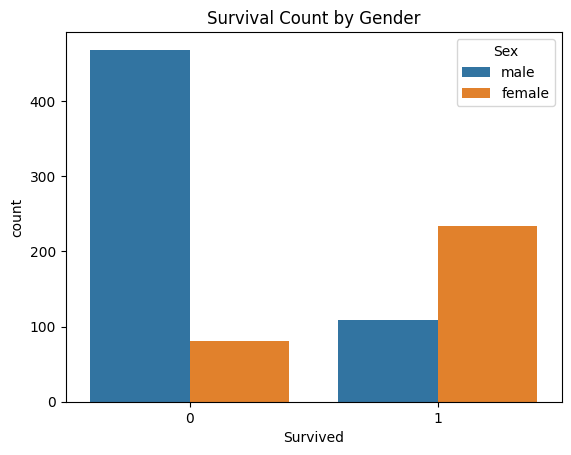

In [116]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

# Shows that less male survived than females

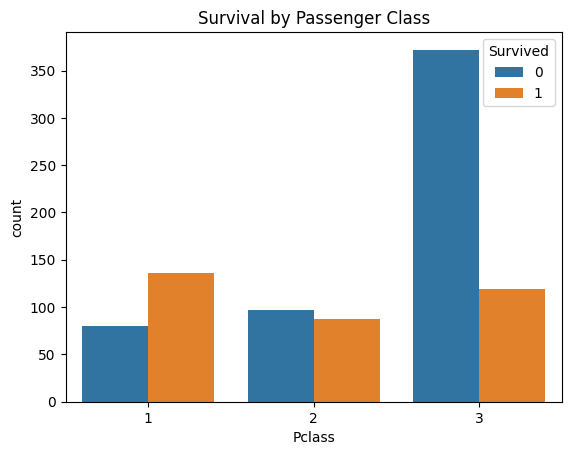

In [117]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Pclass has the largest no of survivors depicting Pclass-3 was safest

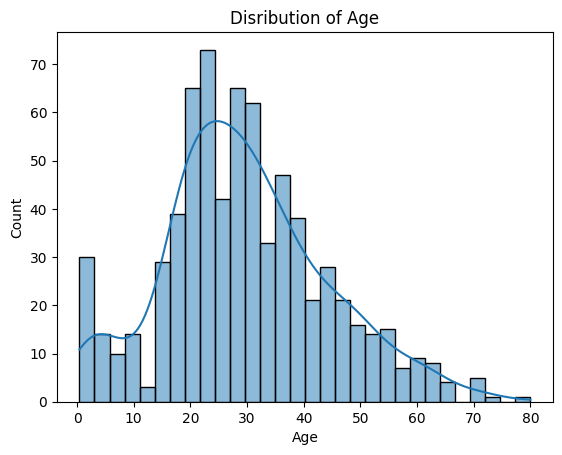

In [118]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Disribution of Age')
plt.show()

# Age distribution to check if there are any outliers

# 4. Data Cleaning

In [119]:
# Filled Missing values of age using median of grouping of Pclass, embarked and Sex for better imputation.

df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Embarked', 'Sex'])['Age'].transform('median'))

In [120]:
# Filled missing values by the mode value of Embarked.

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [121]:
# Dropped the columns which are less important.

df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# 5. Feature Engineering

In [122]:
# Created new feature: Family = SibSp + Parch + 1 (includes the passenger -> It shows Family Size.

df['Family'] = df['SibSp'] + df['Parch'] + 1

In [123]:
# Create new feature: IsAlone = 1 if alone, else 0.

df['Alone'] = 1  # All values to alone
df['Alone'].loc[df['Family'] > 1] = 0 # Change the alone value to 0 size of family greater than 1

In [124]:
# Encoded the categorical variables (Sex and Embarked) into numeric values.

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0
df['Embarked'] = le.fit_transform(df['Embarked'])

# 6. Model

In [125]:
# Separateed the feature and the target variable

X = df.drop('Survived', axis=1)
y = df['Survived']

In [126]:
# Split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Trained Random Forest model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 7. Evaluation

In [128]:
# Evaluated the model using classification report and Accuracy

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8268156424581006


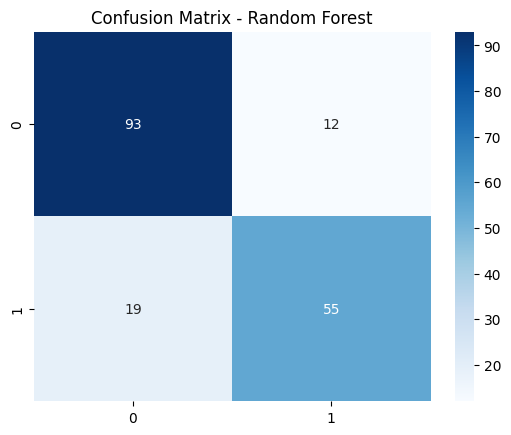

In [129]:
# Confusion Matrix for Random Forest to check the predictions

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()